In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier #importing decision tree classifier
from sklearn.model_selection import train_test_split #importing train_test_split function
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
df=pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [96]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [97]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [98]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

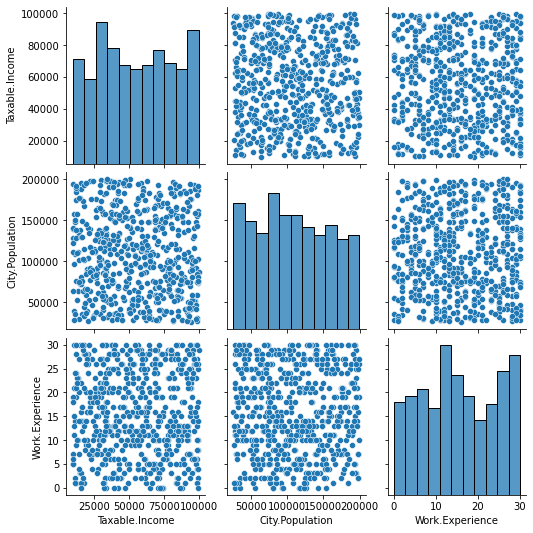

In [99]:
sns.pairplot(df)
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620])
FraudCheck =df.drop(columns=["Taxable.Income"])


### converting categorical data

In [100]:
#Creating dummy vairables for ['Undergrad','Marital.Status','Urban'] dropping first dummy variable
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [101]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [102]:
FCheck = pd.get_dummies(FraudCheck.drop(columns = ["TaxInc"]))
FraudC_final = pd.concat([FCheck, FraudCheck["TaxInc"]], axis = 1)
colnames = list(FraudC_final.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

### Lets assume: taxable_income <= 30000 as “Risky=0” and others are “Good=1”

In [103]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [104]:
#Viewing buttom 10 observations
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


In [105]:
# Declaring features & target
x = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
# Splitting data into train & test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [108]:
#Choosing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [174]:
print('Train accuracy: {}'.format(xtrain,ytrain))
print('Train accuracy: {}'.format(xtest,ytest))

Train accuracy:      City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
118         0.996529         0.333333            0.0                     0.0   
362         0.286053         0.566667            1.0                     0.0   
55          0.368887         0.533333            1.0                     0.0   
90          0.433640         0.966667            0.0                     0.0   
390         0.181294         0.566667            1.0                     0.0   
..               ...              ...            ...                     ...   
277         0.526354         0.366667            0.0                     0.0   
9           0.745424         0.133333            1.0                     0.0   
359         0.755866         0.366667            1.0                     0.0   
192         0.579181         0.333333            1.0                     1.0   
559         0.888769         0.866667            1.0                     0.0   

     Marital.Status_Sin

### Showing overfitting,need to optimize

## Decision Tree Building

In [175]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(FraudC_final, test_size = 0.3)
FraudC_final["TaxInc"].unique()

[(30000, 99620], (10002, 30000]]
Categories (2, interval[int64, right]): [(10002, 30000] < (30000, 99620]]

In [176]:
from sklearn.tree import DecisionTreeClassifier
help(DecisionTreeClassifier)
modelTree = DecisionTreeClassifier(criterion = "entropy")
modelTree.fit(X,
    y)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

DecisionTreeClassifier(criterion='entropy')

In [177]:
# Creating new model testing with new parameters
forest_new = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')  # n_estimators is the number of decision trees
forest_new.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=10, min_samples_split=20)

In [178]:
print('Train accuracy: {}'.format(forest_new.score(xtrain, ytrain)))
print('Test accuracy: {}'.format(forest_new.score(xtest, ytest)))

Train accuracy: 0.7979166666666667
Test accuracy: 0.7916666666666666


#### [forest_new] Model is good

In [179]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = 3, oob_score = True, n_estimators = 15, criterion='gini')

In [180]:
np.shape(FraudC_final) # 600,100 => Shape 
len(y)
len(x)

600

In [181]:
FraudC_final.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES,rf_pred
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333,0.816667
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406,0.387262
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [182]:
FraudC_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City.Population          600 non-null    int64   
 1   Work.Experience          600 non-null    int64   
 2   Undergrad_NO             600 non-null    uint8   
 3   Undergrad_YES            600 non-null    uint8   
 4   Marital.Status_Divorced  600 non-null    uint8   
 5   Marital.Status_Married   600 non-null    uint8   
 6   Marital.Status_Single    600 non-null    uint8   
 7   Urban_NO                 600 non-null    uint8   
 8   Urban_YES                600 non-null    uint8   
 9   TaxInc                   600 non-null    category
 10  rf_pred                  600 non-null    float64 
dtypes: category(1), float64(1), int64(2), uint8(7)
memory usage: 19.0 KB


In [183]:
type([x])
type([y])
y1 = pd.DataFrame(y)
type(y1)


pandas.core.frame.DataFrame

In [184]:
rf.fit(x,y1)
rf.estimators_
rf.classes_
rf.n_classes_
rf.n_features_ 
rf.n_outputs_
rf.oob_score_ 
rf.predict(x)        #1=Good,0=Risky

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1.

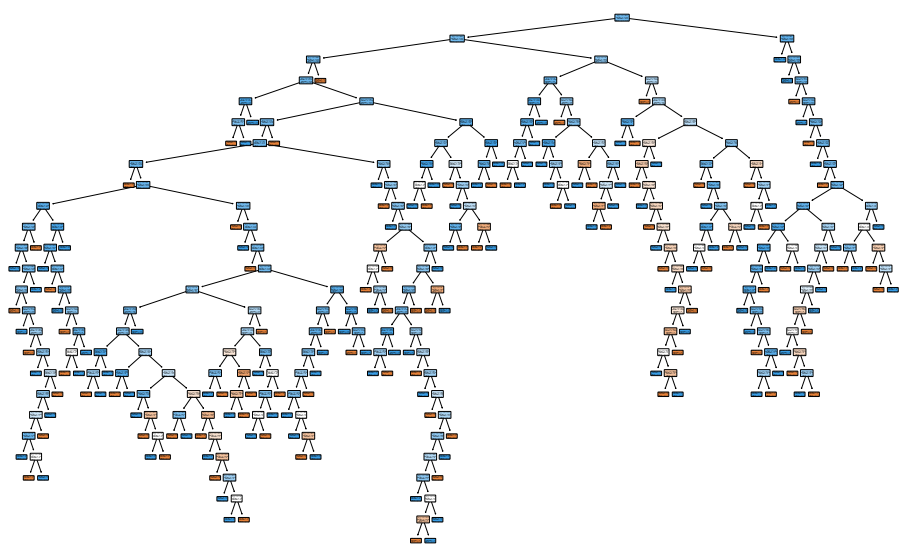

In [185]:
# Prepare a plot figure with set size.
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (16,10))
# Plot the decision tree.
plot_tree(modelTree,rounded = True,filled = True)# Display the tree plot figure.
plt.show()

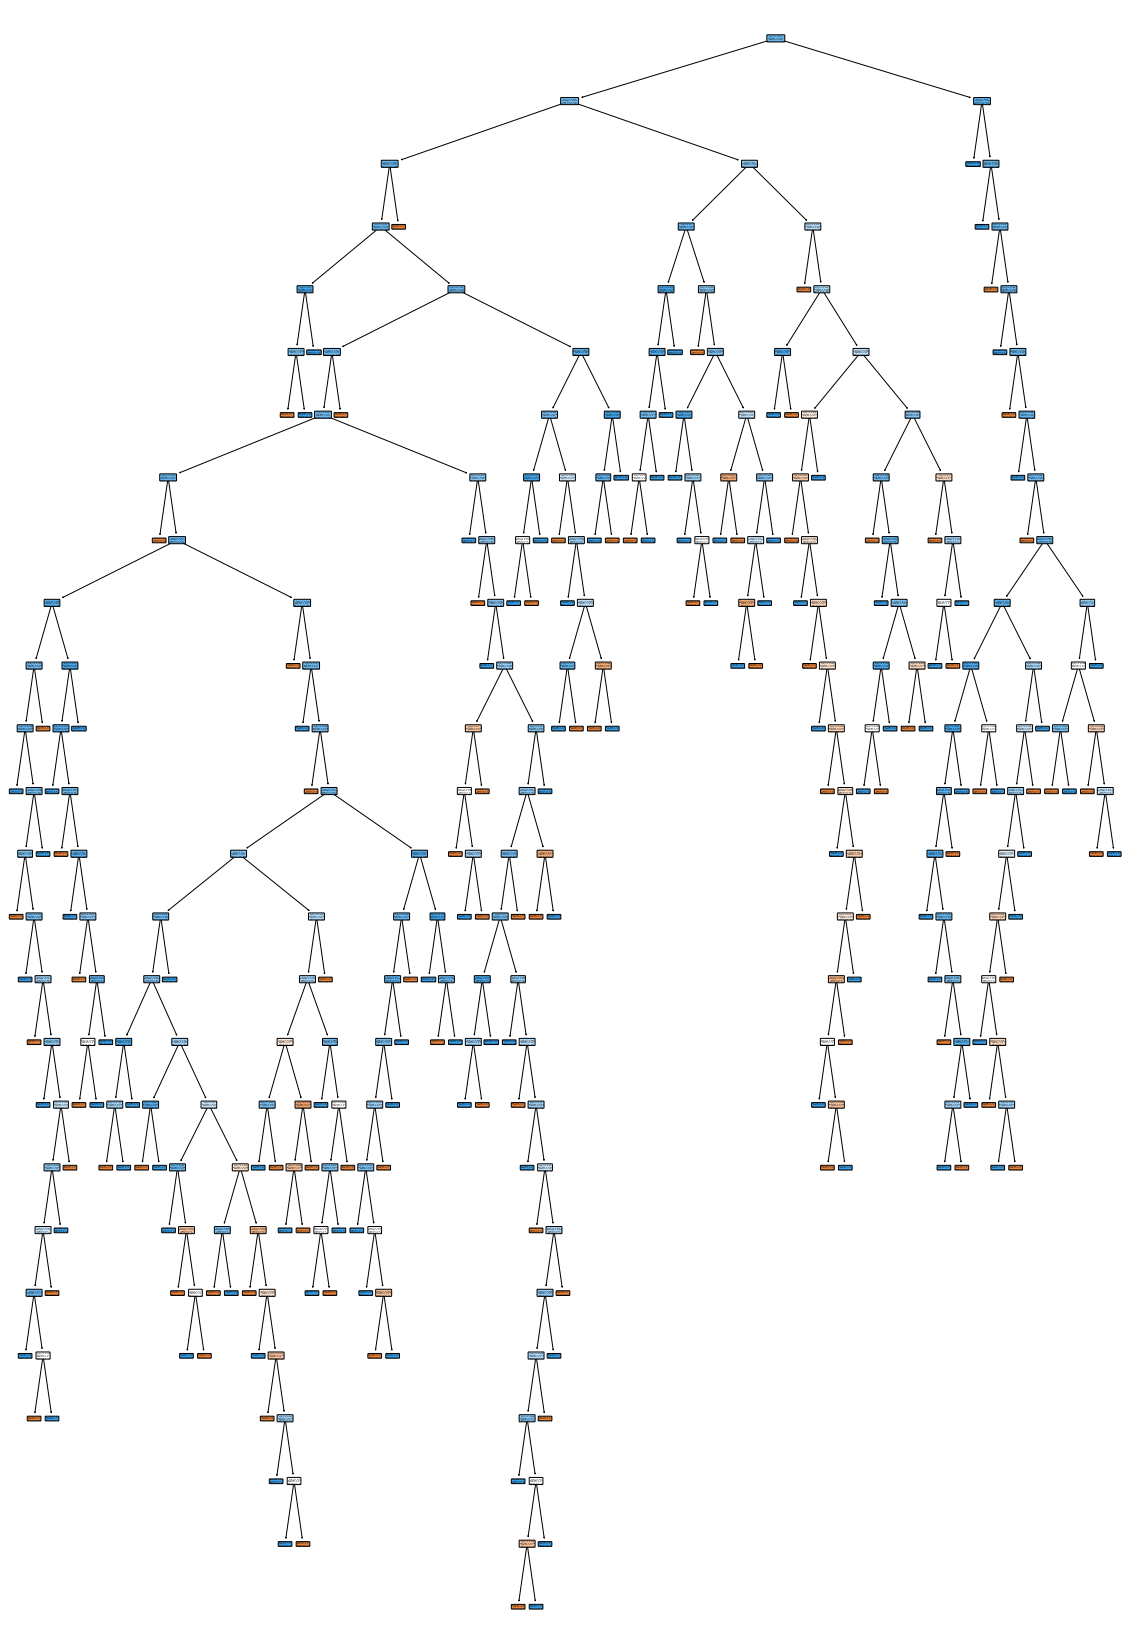

In [186]:
plt.figure(figsize = (20,30))
# Plot the decision tree.
plot_tree(modelTree,rounded = True,filled = True)# Display the tree plot figure.
plt.show()


# ==========================================================================

# Another Method

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
import warnings 
warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [19]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [20]:
fraud.shape

(600, 6)

In [21]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [22]:
fraud.describe(include='all')

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
count,600,600,600.000000,600.000000,600.000000,600
unique,2,3,NaN,NaN,NaN,2
top,YES,Single,NaN,NaN,NaN,YES
freq,312,217,NaN,NaN,NaN,302
mean,NaN,NaN,55208.375000,108747.368333,15.558333,NaN
std,NaN,NaN,26204.827597,49850.075134,8.842147,NaN
min,NaN,NaN,10003.000000,25779.000000,0.000000,NaN
25%,NaN,NaN,32871.500000,66966.750000,8.000000,NaN
50%,NaN,NaN,55074.500000,106493.500000,15.000000,NaN
75%,NaN,NaN,78611.750000,150114.250000,24.000000,NaN


In [23]:
fraud['Marital.Status'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Single
1      Divorced
2       Married
3        Single
4       Married
         ...   
595    Divorced
596    Divorced
597    Divorced
598     Married
599    Divorced
Name: Marital.Status, Length: 600, dtype: object>

### Data Preprocessing

In [24]:
fraud.rename(columns = {'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income',
                        'City.Population':'City_Population','Work.Experience':'Work_Experience'}, inplace = True)
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [25]:
le=LabelEncoder()

In [26]:
fraud['Undergrad']=le.fit_transform(fraud.Undergrad)
fraud['Marital_Status']=le.fit_transform(fraud.Marital_Status)
fraud['Urban']=le.fit_transform(fraud.Urban)

In [27]:
fraud.dtypes

Undergrad          int32
Marital_Status     int32
Taxable_Income     int64
City_Population    int64
Work_Experience    int64
Urban              int32
dtype: object

In [29]:
fraud["Tax"] = pd.cut(fraud["Taxable_Income"], bins = [10000,30000,100000], labels = ["Risky", "Good"])

In [30]:
fraud['Tax']=le.fit_transform(fraud.Tax)

### Model Building

In [31]:
X=fraud.drop('Tax',axis=1)
y=fraud.Tax
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=19)

In [32]:
classifier=DecisionTreeClassifier()

### Model Training
Train data

plotting decision

In [33]:
from sklearn.tree import plot_tree

In [34]:
classifier=classifier.fit(X_train,y_train)

### Model Testing
Train data

In [35]:
y_pred_train=classifier.predict(X_train)

###### Test data

In [36]:
y_pred_test=classifier.predict(X_test)

### Modal Evaluation¶

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  1.0
-------------------------------------------
Confusion Matrix:
 [[405   0]
 [  0 105]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       105

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [38]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))


Accuracy Score :  1.0
-------------------------------------------
Confusion Matrix:
 [[71  0]
 [ 0 19]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        19

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90

